# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [2]:
# your code here
df_bikes = pd.read_csv('C:\\Users\\JiahuiZhu\\Desktop\\BU_hw\\506\hw5\\homework-5-JiahuiZhu666\\citibike.csv')
df_bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [3]:
# Your code here
num_var = df_bikes.columns[df_bikes.dtypes !='object']
cat_var = df_bikes.columns[df_bikes.dtypes =='object']
df_bikes[num_var].isnull().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     3
year                   0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

In [4]:
df_bikes[cat_var].isnull().sum()

season    0
dtype: int64

In [5]:
df_bikes['average_wind_speed'].isnull().sum()

3

In [6]:
df_bikes.fillna(0)
df_bikes[num_var].isnull().sum()

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     3
year                   0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [7]:
df_bikes['weekday']=df_bikes['weekday'].astype('int')
df_bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,1,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,1,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,0,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,0,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,1,True


In [8]:
# Your code here
grouped = df_bikes.groupby('weekday')
df_weekends = grouped.get_group(0)
df_weekdays = grouped.get_group(1)
df_weekends.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,0,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,0,False
9,37201,0.000000,0.0,0.0,82.94,69.98,4.92126,2013,summer,8,False,329,0,False
10,33060,0.000000,0.0,0.0,80.96,64.94,2.46063,2013,summer,8,False,329,0,False
16,37285,0.000000,0.0,0.0,84.02,64.04,2.01324,2013,summer,8,False,329,0,False


In [9]:
df_weekdays.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,1,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,1,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,1,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,1,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,1,True


d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

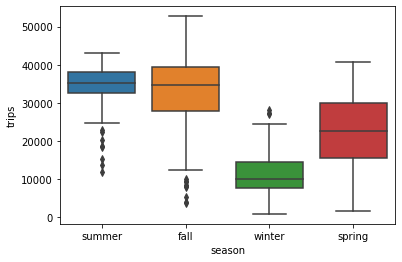

In [30]:
# Your code here
ax_weekdays = sns.boxplot(x="season",y="trips",data=df_weekdays)

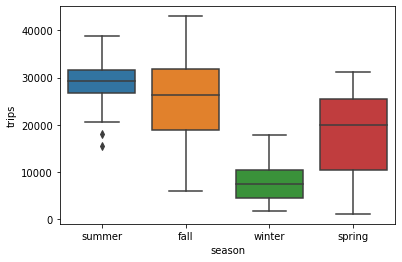

In [31]:
ax_weekends = sns.boxplot(x="season",y="trips",data=df_weekends)

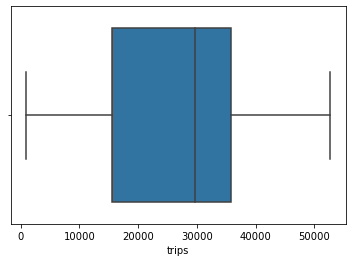

In [141]:
ax = sns.boxplot(x=df_weekdays["trips"])

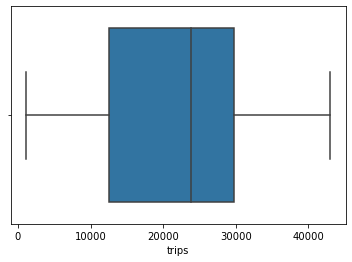

In [143]:
ax = sns.boxplot(x=df_weekends["trips"])

--> Your answer here
# Difference
1. Yes. Distribution sppears among seasons, during summer and fall, the number of trips is larger than number during spring and winter
2. Yes, according to the boxplot, for the maxium and medium number of trips, weekdays are larger than weeknds.

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [10]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
df_weekdays['season'] = pd.factorize(df_weekdays['season'])[0]
# y = df_weekdays.loc[:,'trips']
# X = df_weekdays.loc[:,'season']
# X = pd.get_dummies(X).values

# X1 = []
# for i in range(len(X)):
#     if X[i][0]==1:
#         X1.append(1)
#     if X[i][1]==1:
#         X1.append(2)
#     if X[i][2]==1:
#         y1.append(3)
#     if X[i][3]==1:
#         X1.append(4)
        
Y = df_weekdays[['trips']]
X = df_weekdays[['season']]
X = sm.add_constant(X)
model_weekdays = sm.OLS(Y,X)
res_weekdays = model_weekdays.fit()
res_weekdays.params
print(res_weekdays.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     234.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           5.22e-45
Time:                        16:06:09   Log-Likelihood:                -6487.2
No. Observations:                 608   AIC:                         1.298e+04
Df Residuals:                     606   BIC:                         1.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.498e+04    688.891     50.775      0.0

D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

In [149]:
print(res_weekdays.params)

const     34978.676395
season    -5993.107986
dtype: float64


--> *Your answer here*

There are two coefficients in the model. 
1. const means the interceptor 
2. season is the variable

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

In [156]:
df_weekdays.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,0,8,False,329,1,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,0,8,False,329,1,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,0,8,False,329,1,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,0,8,False,329,1,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,0,8,False,329,1,True


--> *Your answer here*

Let's use the data of row 1, using coefficientsof the model, we get trips: -5993 * 0 + 34978 = 34978, which is near to the real value 35972. The coeffiencts of season is negative means that when parameter of season gets larger the trips become smaller.

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [12]:
# Your code here
df_weekends['season'] = pd.factorize(df_weekends['season'])[0]
Y = df_weekends[['trips']]
X = df_weekends[['season']]
X = sm.add_constant(X)
model_weekends = sm.OLS(Y,X)
res_weekends = model_weekends.fit()
res_weekends.params
print(res_weekends.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     95.91
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           2.73e-19
Time:                        16:06:15   Log-Likelihood:                -2561.2
No. Observations:                 244   AIC:                             5126.
Df Residuals:                     242   BIC:                             5133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.838e+04    913.531     31.068      0.0

D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--> *Your answer here*

The coefficients of season is bigger than weekdays, which means that the slope of line for weekdays is bigger than weeknds. Therefore, we canknow that the season has a bigger influence during weekdays than weeknds.

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [159]:
# Your code here
X = df_weekdays[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']]
Y = df_weekdays[['trips']]
X = sm.add_constant(X)
model_weekdays = sm.OLS(Y,X)
res_weekdays = model_weekdays.fit()
print(res_weekdays.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          3.70e-187
Time:                        15:17:18   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5252.4304   1205.888     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

In [161]:
res_weekdays.params

const             -5252.430415
snow_depth         -280.411273
snowfall            -71.386311
min_temperature     -11.155632
max_temperature     460.941314
precipitation     -8226.549392
month               661.043852
dtype: float64

--> *Your answer here*

The positive coefficient means that this variable is proportional to trips. Take max_temperature as an example, a higher temperature shows that there will be more bike trips. This matches the result that during summer, there are more trips. The negative coefficients means that the relation is inversely proportional. For example, the larger snow fall, the less trips.

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [162]:
# Your code here
X = df_weekdays[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month', 
                    'stations_in_service']]
Y = df_weekdays[['trips']]
X = sm.add_constant(X)
model_weekdays = sm.OLS(Y,X)
results_weekdays = model_weekdays.fit()
print(results_weekdays.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     466.7
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          5.29e-238
Time:                        15:38:28   Log-Likelihood:                -6020.2
No. Observations:                 608   AIC:                         1.206e+04
Df Residuals:                     600   BIC:                         1.209e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.126e+04   1

--> *Your answer here*

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

###  Increase: max_temperature, month, stations in service, min_temperature
###  Decrease: snow depth, precipitation

--> *Your answer here*

e) Which predictors are statistically significant (95% confidence level)? [2pt]

--> *Your answer here*

In [163]:
results_weekdays.conf_int(alpha=0.05, cols=None)

,0,1
const,-34811.347791,-27716.751911
snow_depth,-478.304626,-170.309616
snowfall,-596.720054,341.817709
min_temperature,-50.473479,126.131275
max_temperature,327.507290,490.790078
precipitation,-9239.931841,-7121.263419
month,160.334198,438.745263
stations_in_service,75.797444,95.337262


## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. [2pt]


In [164]:
# your code here
X = df_weekdays[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']].values
snow_depth = df_weekdays['snow_depth'].values
snowfall = df_weekdays['snowfall'].values
min_temperature = df_weekdays['min_temperature'].values
max_temperature = df_weekdays['max_temperature'].values
precipitation = df_weekdays['precipitation'].values
month = df_weekdays['month'].values

In [166]:
correlated = np.zeros([6, 6])
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        correlated[i][j] = np.corrcoef(X[:, i], X[:, j])[0][1]
        
correlated

array([[ 1.        ,  0.26181138, -0.49318738, -0.47565302,  0.02294919,
        -0.43944187],
       [ 0.26181138,  1.        , -0.23784143, -0.23236838,  0.23724561,
        -0.21512648],
       [-0.49318738, -0.23784143,  1.        ,  0.96839992,  0.01344425,
         0.38123565],
       [-0.47565302, -0.23236838,  0.96839992,  1.        , -0.01189473,
         0.32986579],
       [ 0.02294919,  0.23724561,  0.01344425, -0.01189473,  1.        ,
         0.00305873],
       [-0.43944187, -0.21512648,  0.38123565,  0.32986579,  0.00305873,
         1.        ]])

--> Your answer here

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

--> *Your answer here*

Min and Max temperature is highly correlated. Reason is obvious: From spirng to summer, the max temperature will absolutely go up, so does the minimum temperature

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [167]:
# Your code here
X = df_weekdays[['snow_depth', 'snowfall', 'max_temperature', 'precipitation', 'month']]
Y = df_weekdays[['trips']]
X = sm.add_constant(X)
model_weekdays = sm.OLS(Y,X)
results_weekdays = model_weekdays.fit()
print(results_weekdays.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     399.3
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.80e-188
Time:                        15:50:21   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     602   BIC:                         1.232e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5144.3465   1081.924     

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

In [168]:
# Your code here
# You can add more cells if you need them
results_weekdays.params

const             -5144.346532
snow_depth         -279.179971
snowfall            -69.512964
max_temperature     451.054381
precipitation     -8241.037302
month               657.282601
dtype: float64

--> *Your answer here*

The coefficient of Max temperature is 451. In (3a), coefficient of Max temperature is 460. These two are not very different. But it is still significant.

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

<AxesSubplot:xlabel='month', ylabel='trips'>

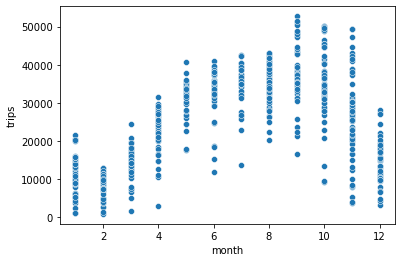

In [169]:
# Your code here
sns.scatterplot(data=df_weekdays, x="month", y="trips")

--> *Your answer here*

We can find that trips are larger during July to November. No, the relationship between month and trips is more like a parabola.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

<AxesSubplot:xlabel='month', ylabel='trips'>

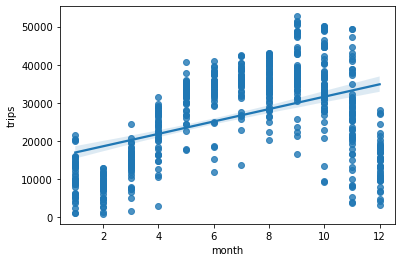

In [173]:
# Your code here
# You can add more cells if you need them
mod_x1 = smf.ols(formula='trips ~ month', data=df_weekdays)
res = mod_x1.fit()
sns.regplot(x='month', y='trips', data=df_weekdays, order =1)

<AxesSubplot:xlabel='month', ylabel='trips'>

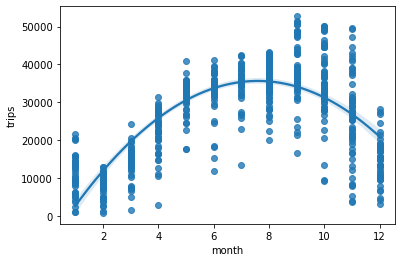

In [175]:
mod_x2 = smf.ols(formula='trips ~ month + I(month**2)', data=df_weekdays)
res = mod_x2.fit()
sns.regplot(x='month', y='trips', data=df_weekdays, order =2)

<AxesSubplot:xlabel='month', ylabel='trips'>

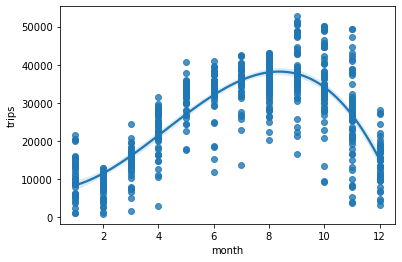

In [176]:
mod_x3 = smf.ols(formula='trips ~ month + I(month**2)+I(month**3) ', data=df_weekdays)
res = mod_x3.fit()
sns.regplot(x='month', y='trips', data=df_weekdays, order =3)

--> *Your answer here*

From these figures, order 3 polynomial regression has the best fit

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


### First: max_temperature

In [178]:
# Your code here
# You can add more cells if you need them
mod_x1 = smf.ols(formula='trips ~ max_temperature ', data=df_weekdays)
res = mod_x1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          6.95e-145
Time:                        16:10:30   Log-Likelihood:                -6256.9
No. Observations:                 608   AIC:                         1.252e+04
Df Residuals:                     606   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5817.3131    985.788     

In [179]:
mod_x2 = smf.ols(formula='trips ~ max_temperature + I(max_temperature**2)', data=df_weekdays)
res = mod_x2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     612.5
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          3.83e-146
Time:                        16:11:07   Log-Likelihood:                -6250.2
No. Observations:                 608   AIC:                         1.251e+04
Df Residuals:                     605   BIC:                         1.252e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [180]:
mod_x3 = smf.ols(formula='trips ~ max_temperature + I(max_temperature**2)+I(max_temperature**3) ', data=df_weekdays)
res = mod_x3.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     435.9
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.22e-150
Time:                        16:11:27   Log-Likelihood:                -6236.4
No. Observations:                 608   AIC:                         1.248e+04
Df Residuals:                     604   BIC:                         1.250e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

From the sumary, Degree 4 is the best

### Second: snow fall

In [181]:
mod_x1 = smf.ols(formula='trips ~ snowfall ', data=df_weekdays)
res = mod_x1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     55.38
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           3.42e-13
Time:                        16:13:19   Log-Likelihood:                -6560.1
No. Observations:                 608   AIC:                         1.312e+04
Df Residuals:                     606   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.72e+04    482.607     56.364      0.0

In [182]:
mod_x2 = smf.ols(formula='trips ~ snowfall + I(snowfall**2)', data=df_weekdays)
res = mod_x2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     36.94
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           7.32e-16
Time:                        16:13:32   Log-Likelihood:                -6551.6
No. Observations:                 608   AIC:                         1.311e+04
Df Residuals:                     605   BIC:                         1.312e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.739e+04    478.534  

In [183]:
mod_x3 = smf.ols(formula='trips ~ snowfall + I(snowfall**2)+I(snowfall**3) ', data=df_weekdays)
res = mod_x3.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     26.58
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           3.70e-16
Time:                        16:13:44   Log-Likelihood:                -6549.0
No. Observations:                 608   AIC:                         1.311e+04
Df Residuals:                     604   BIC:                         1.312e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.746e+04    477.842  

It's hard to get the relationship between trips and snowfall

### Third: precipitation

In [184]:
mod_x1 = smf.ols(formula='trips ~ precipitation', data=df_weekdays)
res = mod_x1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     46.04
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.77e-11
Time:                        16:15:02   Log-Likelihood:                -6564.4
No. Observations:                 608   AIC:                         1.313e+04
Df Residuals:                     606   BIC:                         1.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.776e+04    507.285     54.718

In [185]:
mod_x2 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)', data=df_weekdays)
res = mod_x2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     26.94
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           6.20e-12
Time:                        16:15:14   Log-Likelihood:                -6560.7
No. Observations:                 608   AIC:                         1.313e+04
Df Residuals:                     605   BIC:                         1.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.807e+

In [186]:
mod_x2 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)+I(precipitation**3) ', data=df_weekdays)
res = mod_x2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.81e-13
Time:                        16:15:32   Log-Likelihood:                -6555.3
No. Observations:                 608   AIC:                         1.312e+04
Df Residuals:                     604   BIC:                         1.314e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.849e+

Still hard to find relationship and fit trips to precipitation

--> *Your answer here*

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

In [14]:
# Your code here
# You can add more cells if you need them
# To save time, useing function to do this
def get_R_squared(dataset, input_formula):
    mod = smf.ols(formula=input_formula, data=dataset)
    res = mod.fit()
    print(res.summary())
    
get_R_squared(df_weekends, 'trips ~ precipitation + I(precipitation**2)+I(precipitation**3)')

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.501
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           5.92e-06
Time:                        16:07:09   Log-Likelihood:                -2588.3
No. Observations:                 244   AIC:                             5185.
Df Residuals:                     240   BIC:                             5198.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.285e+

--> *Your answer here*

We can know that the weedends' coef are more larger than weekdays. And other varibles stay same conditions.